# BASELINE

Uruchamia jeden prosty model i jedną metryke na zbiorze

1. Wczytanie danych
2. Dzielenie na zbiór testowy i treningowy
3. Uruchomienie modelu RandomForest
4. Obliczenie metryki RMSE
5. Wizualizacja



In [1]:
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Ustawienia
pd.set_option('display.max_columns', None)

print("Gotowe")

Gotowe


## 1. Wczytanie danych


In [2]:
# Wczytanie danych

df = pd.read_csv('../data/02_interim/wec_lap_data_cleaned.csv')
print(" Wczytano dane:", df.shape)
df.head()


 Wczytano dane: (1000, 49)


,Unnamed: 0,number,driver_number,lap_number,lap_time,lap_improvement,s1,s1_improvement,s2,s2_improvement,s3,s3_improvement,kph,elapsed,hour,s1_large,s2_large,s3_large,top_speed,driver_name,class,team,manufacturer,season,circuit,round,vehicle,team_no,lap_time_ms,lap_time_s,engine,driver_stint_no,driver_stint,team_stint_no,team_stint,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_s,lap_time_seconds,class_encoded,season_encoded,circuit_encoded,engine_encoded
0,332256,86,1,74,0 days 00:01:43.936000,0,22.769,0,32.167,0,49.000,0,158.0,0 days 02:20:17.276000,13:18:40.480,0 days 00:00:22.769000,0 days 00:00:32.167000,0 days 00:00:49,266.0,Michael WAINWRIGHT,LMGTE Am,Gulf Racing,Porsche,2018-2019,FUJI SPEEDWAY,4,Porsche 911 RSR-19,Gulf Racing #86,103936.0,103.936,Porsche,1,Michael WAINWRIGHT Stint #1,4,Gulf Racing #86 Stint #4,8417276,25.0,1.0,75403.0,75.403,809.805,0.000,0.000,8417.276,103.936,2,6,9,14
1,161880,8,2,127,0 days 00:01:39.625000,0,47.682,0,36.208,0,15.735,0,185.6,0 days 03:50:07.821000,16:49,0 days 00:00:47.682000,0 days 00:00:36.208000,0 days 00:00:15.735000,313.7,Oliver JARVIS,LMP1,Audi Sport Team Joest,Audi,2015,NURBURGRING,4,Audi R18 e-tron quattro,Audi Sport Team Joest #8,99625.0,99.625,Audi,2,Oliver JARVIS Stint #2,5,Audi Sport Team Joest #8 Stint #5,13807821,4.0,4.0,31006.0,31.006,115.846,31.006,115.846,13807.821,99.625,4,3,14,2
2,456701,36,1,253,0 days 00:03:35.407000,0,33.580,0,81.924,0,99.903,0,227.7,0 days 16:57:45.640000,08:57:45.640,0 days 00:00:33.580000,0 days 00:01:21.924000,0 days 00:01:39.903000,318.2,André NEGRÃO,HYPERCAR,Alpine Elf Matmut,Alpine,2021,LE MANS,4,Alpine A480,Alpine Elf Matmut #36,215407.0,215.407,Gibson,8,André NEGRÃO Stint #8,22,Alpine Elf Matmut #36 Stint #22,61065640,3.0,3.0,1026862.0,1026.862,1095.407,1026.862,1095.407,61065.640,215.407,1,8,11,8
3,423810,54,1,16,0 days 00:02:19.775000,0,39.990,0,64.012,0,35.773,0,180.4,0 days 00:37:38.114000,14:07:39.682,0 days 00:00:39.990000,0 days 00:01:04.012000,0 days 00:00:35.773000,263.0,Thomas FLOHR,LMGTE Am,AF Corse,Ferrari,2021,SPA FRANCORCHAMPS,1,Ferrari 488 GTE Evo,AF Corse #54,139775.0,139.775,Ferrari,1,Thomas FLOHR Stint #1,1,AF Corse #54 Stint #1,2258114,29.0,8.0,17974.0,17.974,235.302,17.974,51.331,2258.114,139.775,2,8,18,5
4,436233,31,1,268,0 days 00:01:39.540000,0,29.257,0,30.172,0,40.111,0,168.3,0 days 07:15:15.938000,18:15:33.420,0 days 00:00:29.257000,0 days 00:00:30.172000,0 days 00:00:40.111000,298.3,Robin FRIJNS,LMP2,Team WRT,Oreca,2021,AUTODROMO DO ALGARVE,2,Oreca 07,Team WRT #31,99540.0,99.540,Gibson,3,Robin FRIJNS Stint #3,11,Team WRT #31 Stint #11,26115938,6.0,3.0,41709.0,41.709,415.899,41.709,51.309,26115.938,99.540,7,8,0,8


## 2. Dzielenie na zbiór testowy i treningowy

In [3]:
# Konwersja kolumn czasowych na sekundy
time_cols = [c for c in df.columns if df[c].astype(str).str.contains("days").any()]
print("Kolumny czasowe do konwersji:", time_cols)

for col in time_cols:
    df[col] = pd.to_timedelta(df[col], errors='coerce').dt.total_seconds()

# Ustalenie kolumny docelowej
target_col = "lap_time"
y = df[target_col]
X = df.drop(columns=[target_col])

# One-hot encoding dla zmiennych kategorycznych
X = pd.get_dummies(X, drop_first=True)

# Usunięcie ewentualnych braków
X = X.fillna(0)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Kolumny czasowe do konwersji: ['lap_time', 'elapsed', 's1_large', 's2_large', 's3_large']


## 3. Uruchomienie modelu

In [4]:
# Model bazowy
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 4. Oblicznie metryki

In [5]:
#Predykcja i metryka RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE (test): {rmse:.4f}")

RMSE (test): 9.4511


## 5. Wizualizacja

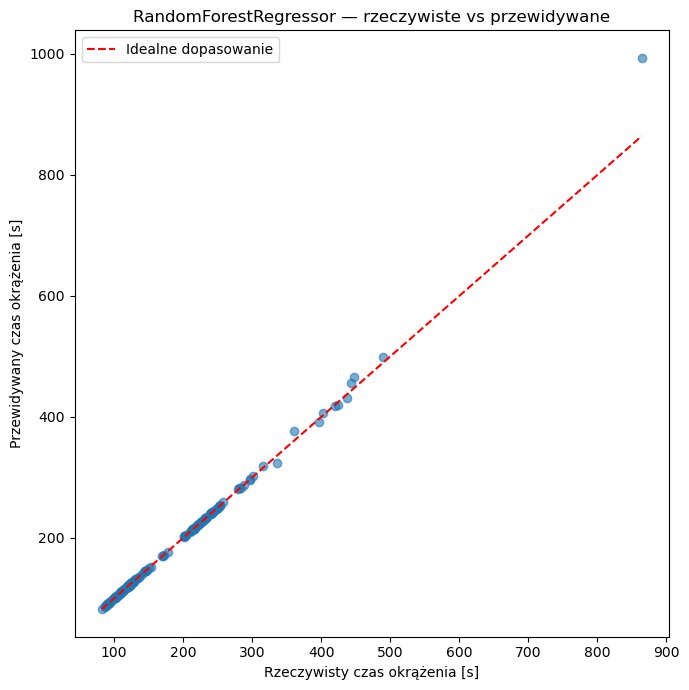

In [6]:
#  Wizualizacja: rzeczywiste vs. przewidywane
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label='Idealne dopasowanie')
plt.xlabel("Rzeczywisty czas okrążenia [s]")
plt.ylabel("Przewidywany czas okrążenia [s]")
plt.title("RandomForestRegressor — rzeczywiste vs przewidywane")
plt.legend()
plt.tight_layout()
plt.show()